# Project: Dog vs Cat Classification

In [71]:
from pathlib import Path
import os
import torch
from torch import nn

In [72]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [73]:
data_path = Path("data/")
train_path = data_path / "train"
test_path = data_path / "test"

train_path, test_path

(WindowsPath('data/train'), WindowsPath('data/test'))

In [74]:
from PIL import Image
import random
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 1.0, 'Dog, Shape: (375, 500, 3)')

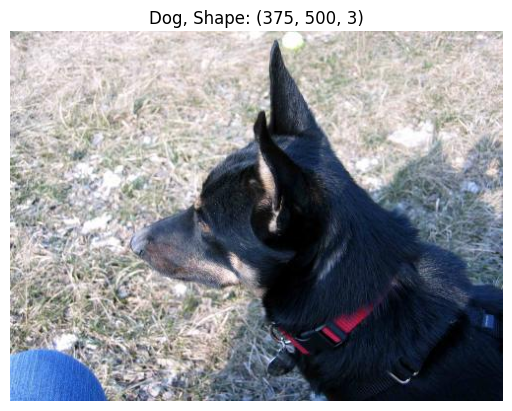

In [75]:
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
image_path_list = list(data_path.glob("*/*/*.jpg"))

random_image_path = random.choice(image_path_list)

image_class = random_image_path.parent.stem

img = Image.open(random_image_path)
img_is_array = np.asarray(img)

plt.imshow(img)
plt.axis(False)
plt.title(f"{image_class}, Shape: {img_is_array.shape}")

In [76]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [77]:
data_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

test_data_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor()
])

In [78]:
transformed_image = data_transform(img)
transformed_image

tensor([[[0.7608, 0.7725, 0.8431,  ..., 0.7647, 0.7373, 0.6510],
         [0.8353, 0.8510, 0.8471,  ..., 0.7569, 0.7608, 0.8000],
         [0.9137, 0.8902, 0.8353,  ..., 0.8078, 0.7765, 0.8667],
         ...,
         [0.0157, 0.0118, 0.0118,  ..., 0.3922, 0.4157, 0.4627],
         [0.0196, 0.0157, 0.0118,  ..., 0.3882, 0.4078, 0.4235],
         [0.0196, 0.0118, 0.0118,  ..., 0.3569, 0.3804, 0.4078]],

        [[0.7569, 0.7451, 0.8039,  ..., 0.7529, 0.7373, 0.6510],
         [0.8078, 0.8196, 0.8196,  ..., 0.7294, 0.7451, 0.7725],
         [0.8627, 0.8588, 0.8157,  ..., 0.7725, 0.7373, 0.8314],
         ...,
         [0.0392, 0.0392, 0.0392,  ..., 0.6118, 0.6314, 0.6667],
         [0.0431, 0.0392, 0.0392,  ..., 0.6118, 0.6235, 0.6275],
         [0.0431, 0.0392, 0.0392,  ..., 0.5725, 0.5961, 0.6235]],

        [[0.7294, 0.7451, 0.8118,  ..., 0.7373, 0.7137, 0.6392],
         [0.8078, 0.8392, 0.8431,  ..., 0.7294, 0.7294, 0.7686],
         [0.8706, 0.8706, 0.8353,  ..., 0.7804, 0.7294, 0.

Text(0.5, 1.0, 'Dog, Shape: torch.Size([3, 64, 64])')

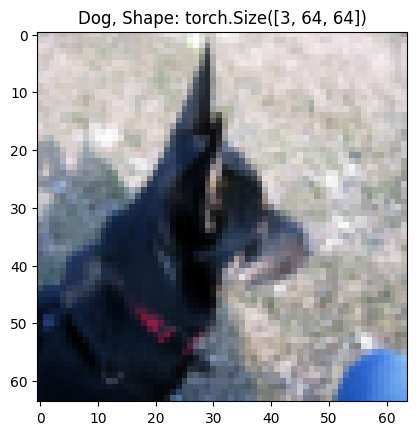

In [79]:
plt.imshow(transformed_image.permute(1, 2, 0))
plt.title(f"{image_class}, Shape: {transformed_image.shape}")

# Loading data using 'ImageFolder'

In [80]:
train_data = datasets.ImageFolder(root=train_path,
                                  transform=data_transform)

test_data = datasets.ImageFolder(root=test_path,
                                 transform=test_data_transform)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 2608
     Root location: data\train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 594
     Root location: data\test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
            ))

In [81]:
# Get class names as list
class_names = train_data.classes
class_names

['Cat', 'Dog']

In [82]:
# Get class names as dictionary 
class_dict = train_data.class_to_idx
class_dict

{'Cat': 0, 'Dog': 1}

In [83]:
len(train_data), len(test_data)

(2608, 594)

# Turn loaded images into 'DataLoader'

In [84]:
BATCH_SIZE = 32
NUM_WORKERS = 0

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              num_workers=NUM_WORKERS,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             num_workers=NUM_WORKERS,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x25b882267f0>,
 <torch.utils.data.dataloader.DataLoader at 0x25b882266a0>)

In [85]:
img_custom, label_custom = next(iter(train_dataloader))

img_custom.shape, label_custom.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [86]:
class DogVsCat(nn.Module):
    def __init__(self, input_shape, hidden_layers, output_shape):
        super().__init__()

        self.conv_block_layer_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_layers,
                      kernel_size=3,
                      padding=1,
                      stride=1),
            nn.BatchNorm2d(num_features=hidden_layers),
            nn.ReLU(),
            #nn.Dropout(p=0.2),
            nn.Conv2d(in_channels=hidden_layers,
                      out_channels=hidden_layers * 2,
                      kernel_size=3,
                      padding=1,
                      stride=1),
            nn.BatchNorm2d(num_features=hidden_layers*2),
            nn.ReLU(),
            #nn.Dropout(p=0.2),
            nn.MaxPool2d(kernel_size=2,
                         stride=2)
        )

        self.conv_block_layer_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_layers*2,
                      out_channels=hidden_layers*2*2,
                      kernel_size=3,
                      padding=1,
                      stride=1),
            nn.BatchNorm2d(num_features=hidden_layers*2*2),
            nn.ReLU(),
            #nn.Dropout(p=0.2),
            nn.Conv2d(in_channels=hidden_layers*2*2,
                      out_channels=hidden_layers*2*2*2,
                      kernel_size=3,
                      padding=1,
                      stride=1),
            nn.BatchNorm2d(num_features=hidden_layers*2*2*2),
            nn.ReLU(),
           # nn.Dropout(p=0.2),
            nn.MaxPool2d(kernel_size=2,
                         stride=2)
        )

        self.classification = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_layers*16*16*8,
                      #out_features=output_shape
                      out_features=128),
            nn.ReLU(),
            nn.Linear(128, output_shape)
        )

    def forward(self, x):
        #print(f"Shape: {x.shape}")
        x = self.conv_block_layer_1(x)
        #print(f"Shape: {x.shape}")
        x = self.conv_block_layer_2(x)
        #print(f"Shape: {x.shape}")
        x = self.classification(x)
        #print(f"Shape: {x.shape}")
        return x
        

In [87]:
model_0 = DogVsCat(input_shape=3, hidden_layers=16, output_shape=1).to(device)
model_0

DogVsCat(
  (conv_block_layer_1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_layer_2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classification): S

In [88]:
# Setup loss function and optimizer
loss_fn = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(),
                             lr=0.001)

loss_fn, optimizer

(BCEWithLogitsLoss(),
 Adam (
 Parameter Group 0
     amsgrad: False
     betas: (0.9, 0.999)
     capturable: False
     differentiable: False
     eps: 1e-08
     foreach: None
     fused: None
     lr: 0.001
     maximize: False
     weight_decay: 0
 ))

In [89]:
# Check the correct shape on dummy tensor
dummy_input = torch.randn(32, 3, 64, 64)
output = model_0(dummy_input.to(device))
output

tensor([[ 0.0561],
        [ 0.2739],
        [ 0.1693],
        [ 0.0648],
        [ 0.2459],
        [ 0.0581],
        [ 0.3180],
        [ 0.0886],
        [ 0.0291],
        [ 0.0908],
        [ 0.2867],
        [ 0.1316],
        [ 0.2058],
        [ 0.2854],
        [ 0.1809],
        [ 0.3886],
        [ 0.3231],
        [ 0.3600],
        [ 0.2824],
        [ 0.0619],
        [ 0.0760],
        [-0.0728],
        [ 0.1347],
        [ 0.1183],
        [ 0.4173],
        [ 0.0227],
        [-0.0582],
        [ 0.0073],
        [ 0.2539],
        [ 0.1679],
        [ 0.3027],
        [ 0.4215]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [90]:
from tqdm import tqdm
import time

In [91]:
epochs = 5

start_time = time.time()

results = {"train_loss": [],
               "train_acc": [],
               "test_loss": [],
               "test_acc": []}

for epoch in tqdm(range(epochs)):

    model_0.train()
    train_loss, train_acc = 0, 0
    
    for batch, (X, y) in enumerate(train_dataloader):
        X, y = X.to(device), y.to(device)

        y = y.unsqueeze(dim=1).float()
        
        y_pred = model_0(X)

        loss = loss_fn(y_pred, y)
        train_loss += loss.item()
        
        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

        y_pred_class = (torch.sigmoid(y_pred) > 0.5).float()
        train_acc += (y_pred_class==y).sum().item() / len(y_pred)

    train_loss /= len(train_dataloader)
    train_acc = (train_acc / len(train_dataloader)) * 100
    
    model_0.eval()
    test_loss, test_acc = 0, 0
    
    with torch.inference_mode():
        for batch, (X, y) in enumerate(test_dataloader):
            X, y = X.to(device), y.to(device)

            y = y.unsqueeze(dim=1).float()
        
            test_pred = model_0(X)

            loss = loss_fn(test_pred, y)
            test_loss += loss.item()

            test_pred_class = (torch.sigmoid(test_pred) > 0.5).float()
            test_acc += (test_pred_class==y).sum().item() / len(test_pred)
    
        test_loss /= len(test_dataloader)
        test_acc = (test_acc / len(test_dataloader)) * 100

    print(f"Epoch: {epoch} | Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.2f} | Test Loss: {test_loss}, Test Accuracy: {test_acc}")

    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)
    


end_time = time.time()
train_time = end_time - start_time

print(f"Total time: {train_time}")

 20%|██        | 1/5 [00:07<00:30,  7.51s/it]

Epoch: 0 | Train Loss: 1.6411, Train Accuracy: 54.65 | Test Loss: 0.6606881743983218, Test Accuracy: 60.30701754385965


 40%|████      | 2/5 [00:15<00:22,  7.61s/it]

Epoch: 1 | Train Loss: 0.6692, Train Accuracy: 60.94 | Test Loss: 0.618592808121129, Test Accuracy: 64.49195906432749


 60%|██████    | 3/5 [00:22<00:14,  7.30s/it]

Epoch: 2 | Train Loss: 0.6653, Train Accuracy: 63.38 | Test Loss: 0.6162721200993186, Test Accuracy: 63.96198830409357


 80%|████████  | 4/5 [00:28<00:07,  7.11s/it]

Epoch: 3 | Train Loss: 0.6065, Train Accuracy: 67.23 | Test Loss: 0.6067569318570589, Test Accuracy: 69.33479532163742


100%|██████████| 5/5 [00:35<00:00,  7.11s/it]

Epoch: 4 | Train Loss: 0.5819, Train Accuracy: 69.05 | Test Loss: 0.5891078302734777, Test Accuracy: 70.44956140350877
Total time: 35.54500389099121


# Plot model_0 results

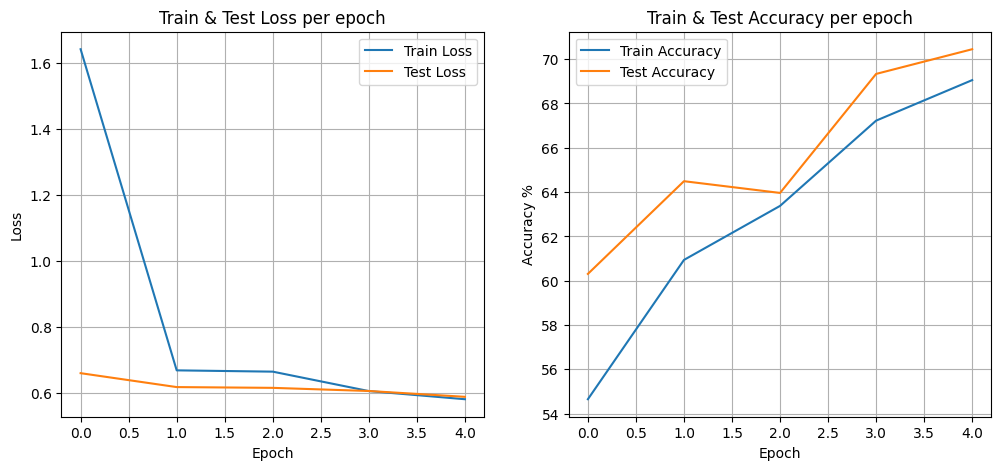

In [92]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(epochs), results["train_loss"], label="Train Loss")
plt.plot(range(epochs), results["test_loss"], label="Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Train & Test Loss per epoch")
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(range(epochs), results["train_acc"], label="Train Accuracy")
plt.plot(range(epochs), results["test_acc"], label="Test Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy %")
plt.title("Train & Test Accuracy per epoch")
plt.legend()
plt.grid()



In [93]:
print(len(results["train_loss"]), len(results["test_loss"]))
print(len(results["train_acc"]), len(results["test_acc"]))

5 5
5 5


In [94]:
# Build train and test function to make training easier
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim,
               device=device):

    train_loss, correct_preds, total_samples = 0, 0, 0
    model.train()

    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        y = y.unsqueeze(dim=1).float()
        
        y_pred = model(X)

        loss = loss_fn(y_pred, y)
        train_loss += loss.item()
        
        optimizer.zero_grad()

        loss.backward()

        optimizer.step()
        
        y_pred_class = (torch.sigmoid(y_pred) > 0.5).float()
        #train_acc += (y_pred_class==y).sum().item() / len(y_pred)
        correct_preds += (y_pred_class == y).sum().item()
        total_samples += y.size(0)

    train_loss /= len(dataloader)
    #train_acc = (train_acc / len(dataloader)) * 100
    train_acc = (correct_preds / total_samples) * 100
    
    return train_loss, train_acc

In [95]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device=device):

    test_loss, correct_preds, total_samples = 0, 0, 0
    model.eval()
    with torch.inference_mode():
        for batch, (X, y) in enumerate(dataloader):
            X, y = X.to(device), y.to(device)

            y = y.unsqueeze(dim=1).float()
        
            test_pred = model(X)

            loss = loss_fn(test_pred, y)
            test_loss += loss.item()

            test_pred_class = (torch.sigmoid(test_pred) > 0.5).float()
            #test_acc += (test_pred_class==y).sum().item() / len(test_pred)
            correct_preds += (test_pred_class == y).sum().item()
            total_samples += y.size(0)
    
    test_loss /= len(dataloader)
    #test_acc = (test_acc / len(dataloader)) * 100
    test_acc = (correct_preds / total_samples) * 100
    return test_loss, test_acc

# Augmentation data

In [96]:
train_data_transform_augmentation = transforms.Compose([
    #transforms.Resize(size=(64, 64)),
    transforms.RandomResizedCrop(size=(64, 64), scale=(0.8, 1.0)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(degrees=15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    #transforms.RandomAffine(degrees=15, translate=(1, 1)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31), # used to differentiate the data
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
])

test_data = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
])
train_data_transform_augmentation, test_data

(Compose(
     RandomResizedCrop(size=(64, 64), scale=(0.8, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear, antialias=True)
     RandomHorizontalFlip(p=0.5)
     RandomRotation(degrees=[-15.0, 15.0], interpolation=nearest, expand=False, fill=0)
     ColorJitter(brightness=(0.8, 1.2), contrast=(0.8, 1.2), saturation=(0.8, 1.2), hue=(-0.1, 0.1))
     TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
     ToTensor()
     Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
 ),
 Compose(
     Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
     ToTensor()
     Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
 ))

In [97]:
train_data_augmentation = datasets.ImageFolder(root=train_path,
                                               transform=train_data_transform_augmentation)
test_data_augmentation = datasets.ImageFolder(root=test_path,
                                              transform=test_data)

train_data_augmentation, test_data_augmentation

(Dataset ImageFolder
     Number of datapoints: 2608
     Root location: data\train
     StandardTransform
 Transform: Compose(
                RandomResizedCrop(size=(64, 64), scale=(0.8, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear, antialias=True)
                RandomHorizontalFlip(p=0.5)
                RandomRotation(degrees=[-15.0, 15.0], interpolation=nearest, expand=False, fill=0)
                ColorJitter(brightness=(0.8, 1.2), contrast=(0.8, 1.2), saturation=(0.8, 1.2), hue=(-0.1, 0.1))
                TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
                ToTensor()
                Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
            ),
 Dataset ImageFolder
     Number of datapoints: 594
     Root location: data\test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
                Norma

In [98]:
BATCH_SIZE = 32
NUM_WORKERS = 0

train_dataloader_augmentation = DataLoader(dataset=train_data_augmentation,
                                           batch_size=BATCH_SIZE,
                                           num_workers=NUM_WORKERS,
                                           shuffle=True)

test_dataloader_augmentation = DataLoader(dataset=test_data_augmentation,
                                          batch_size=BATCH_SIZE,
                                          num_workers=NUM_WORKERS,
                                          shuffle=False)

train_dataloader_augmentation, test_dataloader_augmentation

(<torch.utils.data.dataloader.DataLoader at 0x25bb85545e0>,
 <torch.utils.data.dataloader.DataLoader at 0x25bb8554ca0>)

In [99]:
len(class_names)

2

In [100]:
model_1 = DogVsCat(input_shape=3, hidden_layers=8, output_shape=1).to(device)
model_1

DogVsCat(
  (conv_block_layer_1): Sequential(
    (0): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_layer_2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classification): Sequen

In [101]:
# Setup loss function and optimizer
loss_fn = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(), lr=0.001)
                             #lr=0.00025)
#optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.01, momentum=0.9)
loss_fn, optimizer

(BCEWithLogitsLoss(),
 Adam (
 Parameter Group 0
     amsgrad: False
     betas: (0.9, 0.999)
     capturable: False
     differentiable: False
     eps: 1e-08
     foreach: None
     fused: None
     lr: 0.001
     maximize: False
     weight_decay: 0
 ))

In [102]:
# Train model_1 on augmentation data
epochs = 50

start_time = time.time()

results = {"train_loss": [],
               "train_acc": [],
               "test_loss": [],
               "test_acc": []}

for epoch in tqdm(range(epochs)):

    train_loss, train_acc = train_step(model=model_1,
               dataloader=train_dataloader_augmentation,
               loss_fn=loss_fn,
               optimizer=optimizer)

    test_loss, test_acc = test_step(model=model_1,
              dataloader=test_dataloader_augmentation,
              loss_fn=loss_fn)

    print(f"Epoch: {epoch} | Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.2f} | Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.2f}")

    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)
    


end_time = time.time()
train_time = end_time - start_time

print(f"Total time: {train_time}")

  2%|▏         | 1/50 [00:10<08:18, 10.18s/it]

Epoch: 0 | Train Loss: 0.9050, Train Accuracy: 52.42 | Test Loss: 0.7062, Test Accuracy: 58.42


  4%|▍         | 2/50 [00:20<08:07, 10.16s/it]

Epoch: 1 | Train Loss: 0.7025, Train Accuracy: 53.37 | Test Loss: 0.6950, Test Accuracy: 55.89


  6%|▌         | 3/50 [00:30<08:05, 10.33s/it]

Epoch: 2 | Train Loss: 0.6729, Train Accuracy: 59.66 | Test Loss: 0.6296, Test Accuracy: 64.14


  8%|▊         | 4/50 [00:41<07:57, 10.38s/it]

Epoch: 3 | Train Loss: 0.6673, Train Accuracy: 59.55 | Test Loss: 0.6248, Test Accuracy: 66.67


 10%|█         | 5/50 [00:52<08:03, 10.75s/it]

Epoch: 4 | Train Loss: 0.6499, Train Accuracy: 61.46 | Test Loss: 0.6079, Test Accuracy: 66.50


 12%|█▏        | 6/50 [01:03<08:00, 10.92s/it]

Epoch: 5 | Train Loss: 0.6488, Train Accuracy: 61.39 | Test Loss: 0.6293, Test Accuracy: 60.77


 14%|█▍        | 7/50 [01:15<07:51, 10.96s/it]

Epoch: 6 | Train Loss: 0.6533, Train Accuracy: 60.24 | Test Loss: 0.6054, Test Accuracy: 67.34


 16%|█▌        | 8/50 [01:25<07:30, 10.73s/it]

Epoch: 7 | Train Loss: 0.6270, Train Accuracy: 64.19 | Test Loss: 0.6738, Test Accuracy: 56.57


 18%|█▊        | 9/50 [01:35<07:19, 10.72s/it]

Epoch: 8 | Train Loss: 0.6396, Train Accuracy: 62.35 | Test Loss: 0.5907, Test Accuracy: 68.35


 20%|██        | 10/50 [01:46<07:08, 10.70s/it]

Epoch: 9 | Train Loss: 0.6232, Train Accuracy: 64.23 | Test Loss: 0.5932, Test Accuracy: 64.65


 22%|██▏       | 11/50 [01:56<06:48, 10.48s/it]

Epoch: 10 | Train Loss: 0.6164, Train Accuracy: 65.41 | Test Loss: 0.6258, Test Accuracy: 63.97


 24%|██▍       | 12/50 [02:07<06:45, 10.66s/it]

Epoch: 11 | Train Loss: 0.6210, Train Accuracy: 65.99 | Test Loss: 0.5809, Test Accuracy: 69.02


 26%|██▌       | 13/50 [02:19<06:44, 10.93s/it]

Epoch: 12 | Train Loss: 0.6162, Train Accuracy: 64.03 | Test Loss: 0.5710, Test Accuracy: 70.03


 28%|██▊       | 14/50 [02:30<06:34, 10.96s/it]

Epoch: 13 | Train Loss: 0.6217, Train Accuracy: 64.30 | Test Loss: 0.5473, Test Accuracy: 71.21


 30%|███       | 15/50 [02:41<06:27, 11.08s/it]

Epoch: 14 | Train Loss: 0.6075, Train Accuracy: 65.68 | Test Loss: 0.5944, Test Accuracy: 68.35


 32%|███▏      | 16/50 [02:52<06:17, 11.09s/it]

Epoch: 15 | Train Loss: 0.6083, Train Accuracy: 65.84 | Test Loss: 0.5674, Test Accuracy: 71.38


 34%|███▍      | 17/50 [03:03<06:05, 11.08s/it]

Epoch: 16 | Train Loss: 0.5972, Train Accuracy: 67.68 | Test Loss: 0.5514, Test Accuracy: 72.56


 36%|███▌      | 18/50 [03:14<05:54, 11.07s/it]

Epoch: 17 | Train Loss: 0.5888, Train Accuracy: 68.94 | Test Loss: 0.5320, Test Accuracy: 72.90


 38%|███▊      | 19/50 [03:25<05:37, 10.88s/it]

Epoch: 18 | Train Loss: 0.6010, Train Accuracy: 67.02 | Test Loss: 0.5498, Test Accuracy: 71.21


 40%|████      | 20/50 [03:36<05:25, 10.85s/it]

Epoch: 19 | Train Loss: 0.5793, Train Accuracy: 68.94 | Test Loss: 0.5333, Test Accuracy: 72.56


 42%|████▏     | 21/50 [03:46<05:15, 10.88s/it]

Epoch: 20 | Train Loss: 0.5815, Train Accuracy: 68.37 | Test Loss: 0.5290, Test Accuracy: 73.74


 44%|████▍     | 22/50 [03:58<05:06, 10.94s/it]

Epoch: 21 | Train Loss: 0.5861, Train Accuracy: 68.75 | Test Loss: 0.5178, Test Accuracy: 75.08


 46%|████▌     | 23/50 [04:09<04:56, 10.98s/it]

Epoch: 22 | Train Loss: 0.5705, Train Accuracy: 68.29 | Test Loss: 0.5740, Test Accuracy: 72.56


 48%|████▊     | 24/50 [04:20<04:48, 11.08s/it]

Epoch: 23 | Train Loss: 0.5735, Train Accuracy: 69.86 | Test Loss: 0.5190, Test Accuracy: 75.59


 50%|█████     | 25/50 [04:31<04:37, 11.10s/it]

Epoch: 24 | Train Loss: 0.5699, Train Accuracy: 69.02 | Test Loss: 0.5247, Test Accuracy: 72.73


 52%|█████▏    | 26/50 [04:42<04:26, 11.09s/it]

Epoch: 25 | Train Loss: 0.5724, Train Accuracy: 69.52 | Test Loss: 0.5348, Test Accuracy: 73.06


 54%|█████▍    | 27/50 [04:53<04:13, 11.03s/it]

Epoch: 26 | Train Loss: 0.5601, Train Accuracy: 70.28 | Test Loss: 0.5165, Test Accuracy: 74.75


 56%|█████▌    | 28/50 [05:07<04:22, 11.93s/it]

Epoch: 27 | Train Loss: 0.5752, Train Accuracy: 67.41 | Test Loss: 0.5060, Test Accuracy: 73.74


 58%|█████▊    | 29/50 [05:22<04:30, 12.87s/it]

Epoch: 28 | Train Loss: 0.5562, Train Accuracy: 70.36 | Test Loss: 0.5176, Test Accuracy: 73.91


 60%|██████    | 30/50 [05:36<04:21, 13.06s/it]

Epoch: 29 | Train Loss: 0.5501, Train Accuracy: 71.24 | Test Loss: 0.5200, Test Accuracy: 74.07


 62%|██████▏   | 31/50 [05:47<03:57, 12.51s/it]

Epoch: 30 | Train Loss: 0.5509, Train Accuracy: 71.97 | Test Loss: 0.4937, Test Accuracy: 75.25


 64%|██████▍   | 32/50 [05:58<03:35, 11.97s/it]

Epoch: 31 | Train Loss: 0.5436, Train Accuracy: 71.97 | Test Loss: 0.4989, Test Accuracy: 75.42


 66%|██████▌   | 33/50 [06:11<03:31, 12.47s/it]

Epoch: 32 | Train Loss: 0.5399, Train Accuracy: 71.63 | Test Loss: 0.5145, Test Accuracy: 74.41


 68%|██████▊   | 34/50 [06:25<03:26, 12.93s/it]

Epoch: 33 | Train Loss: 0.5575, Train Accuracy: 70.97 | Test Loss: 0.4981, Test Accuracy: 76.09


 70%|███████   | 35/50 [06:36<03:03, 12.25s/it]

Epoch: 34 | Train Loss: 0.5390, Train Accuracy: 71.24 | Test Loss: 0.5032, Test Accuracy: 73.57


 72%|███████▏  | 36/50 [06:47<02:46, 11.90s/it]

Epoch: 35 | Train Loss: 0.5448, Train Accuracy: 71.70 | Test Loss: 0.5179, Test Accuracy: 74.75


 74%|███████▍  | 37/50 [06:59<02:36, 12.00s/it]

Epoch: 36 | Train Loss: 0.5388, Train Accuracy: 71.82 | Test Loss: 0.4935, Test Accuracy: 75.76


 76%|███████▌  | 38/50 [07:11<02:23, 11.96s/it]

Epoch: 37 | Train Loss: 0.5225, Train Accuracy: 73.01 | Test Loss: 0.5329, Test Accuracy: 74.58


 78%|███████▊  | 39/50 [07:26<02:20, 12.76s/it]

Epoch: 38 | Train Loss: 0.5406, Train Accuracy: 72.43 | Test Loss: 0.4760, Test Accuracy: 77.95


 80%|████████  | 40/50 [07:37<02:02, 12.30s/it]

Epoch: 39 | Train Loss: 0.5382, Train Accuracy: 72.39 | Test Loss: 0.4749, Test Accuracy: 78.45


 82%|████████▏ | 41/50 [07:48<01:47, 11.93s/it]

Epoch: 40 | Train Loss: 0.5361, Train Accuracy: 71.63 | Test Loss: 0.4826, Test Accuracy: 75.25


 84%|████████▍ | 42/50 [07:59<01:34, 11.78s/it]

Epoch: 41 | Train Loss: 0.5298, Train Accuracy: 72.51 | Test Loss: 0.4961, Test Accuracy: 75.25


 86%|████████▌ | 43/50 [08:11<01:21, 11.59s/it]

Epoch: 42 | Train Loss: 0.5154, Train Accuracy: 73.77 | Test Loss: 0.5181, Test Accuracy: 74.58


 88%|████████▊ | 44/50 [08:22<01:09, 11.56s/it]

Epoch: 43 | Train Loss: 0.5411, Train Accuracy: 70.51 | Test Loss: 0.5093, Test Accuracy: 75.59


 90%|█████████ | 45/50 [08:33<00:57, 11.42s/it]

Epoch: 44 | Train Loss: 0.5275, Train Accuracy: 72.51 | Test Loss: 0.5232, Test Accuracy: 75.93


 92%|█████████▏| 46/50 [08:44<00:45, 11.33s/it]

Epoch: 45 | Train Loss: 0.5184, Train Accuracy: 73.31 | Test Loss: 0.4836, Test Accuracy: 76.77


 94%|█████████▍| 47/50 [08:55<00:33, 11.19s/it]

Epoch: 46 | Train Loss: 0.5283, Train Accuracy: 72.39 | Test Loss: 0.4726, Test Accuracy: 76.60


 96%|█████████▌| 48/50 [09:05<00:21, 10.87s/it]

Epoch: 47 | Train Loss: 0.5173, Train Accuracy: 73.20 | Test Loss: 0.4655, Test Accuracy: 76.09


 98%|█████████▊| 49/50 [09:15<00:10, 10.63s/it]

Epoch: 48 | Train Loss: 0.5175, Train Accuracy: 72.97 | Test Loss: 0.4632, Test Accuracy: 78.79


100%|██████████| 50/50 [09:25<00:00, 11.32s/it]

Epoch: 49 | Train Loss: 0.5169, Train Accuracy: 73.39 | Test Loss: 0.4736, Test Accuracy: 76.09
Total time: 565.9821634292603


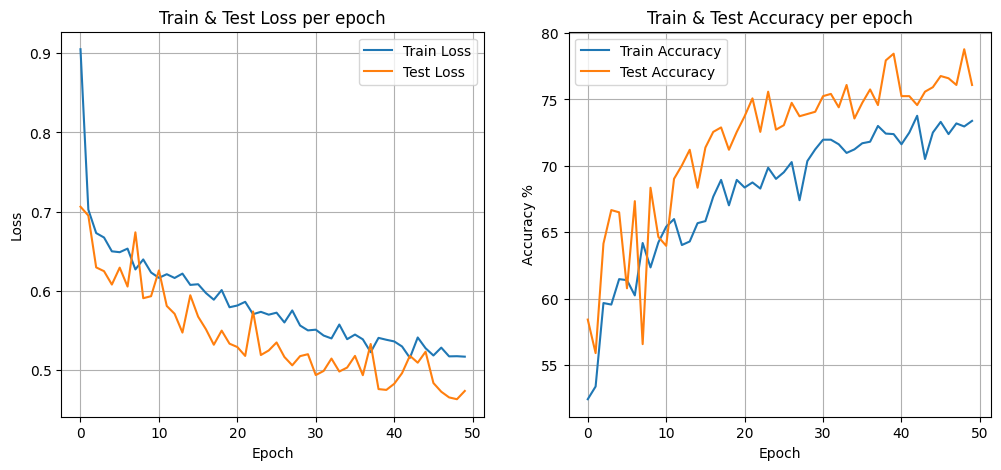

In [103]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(epochs), results["train_loss"], label="Train Loss")
plt.plot(range(epochs), results["test_loss"], label="Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Train & Test Loss per epoch")
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(range(epochs), results["train_acc"], label="Train Accuracy")
plt.plot(range(epochs), results["test_acc"], label="Test Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy %")
plt.title("Train & Test Accuracy per epoch")
plt.legend()
plt.grid()

In [104]:
from torch.utils.data import Subset

In [105]:
train_100_images = Subset(train_data_augmentation, range(100))
test_20_images = Subset(test_data_augmentation, range(20))

len(train_100_images), len(test_20_images)

(100, 20)